# MOVIES RECOOMONDATION SYSTEM

# Name : Sanket Kailas Sonar

# Batch Ml 09

# Import libraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets

In [2]:
credit_df=pd.read_csv("credits.csv")
movies_df=pd.read_csv("movies.csv")

In [3]:
credit_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [4]:
movies_df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   26-10-2015   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   16-07-2012  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   07-03-2012   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

# Merge the datasets

In [5]:
movies_df= movies_df.merge(credit_df, on = "title")

# Data preprocessing

In [6]:
movies_df.shape

(4808, 23)

In [7]:
movies_df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   165.0   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count movie_id  \
0                                    Avatar          7.2      11800    19995   
1  Pirates of the Caribbean: At World's End          6.9       4500      285   
2                                   Spectre          6.3       4466   206647   
3                     The Dark Knight Rises          7.6       9106    49026   
4                               John Carter          6.1       2124    49529   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 0 to 4807
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4808 non-null   int64  
 1   genres                4808 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4808 non-null   int64  
 4   keywords              4808 non-null   object 
 5   original_language     4808 non-null   object 
 6   original_title        4808 non-null   object 
 7   overview              4805 non-null   object 
 8   popularity            4808 non-null   float64
 9   production_companies  4808 non-null   object 
 10  production_countries  4808 non-null   object 
 11  release_date          4807 non-null   object 
 12  revenue               4808 non-null   int64  
 13  runtime               4806 non-null   float64
 14  spoken_languages      4808 non-null   object 
 15  status               

In [9]:
movies_df= movies_df[["movie_id","title","overview","genres","keywords","cast","crew","popularity","vote_count","vote_average"]]

In [10]:
movies_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4  [{"id": 818, "name": "based on novel"}, {"id":...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  popularity  vote_count  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  150.437577       11800   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  139.082615        4500   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  107.376788        4466   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  112.312950        9106   
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...   43.926995        2124   

   vote_average  
0           7.2  
1           6.9  
2           6.3  
3           7.6  
4           6.1

In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 0 to 4807
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4808 non-null   int64  
 1   title         4808 non-null   object 
 2   overview      4805 non-null   object 
 3   genres        4808 non-null   object 
 4   keywords      4808 non-null   object 
 5   cast          4808 non-null   object 
 6   crew          4808 non-null   object 
 7   popularity    4808 non-null   float64
 8   vote_count    4808 non-null   int64  
 9   vote_average  4808 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 413.2+ KB


# calculate missing values

In [12]:
movies_df.isnull().sum()  #sum calculate the count of missing values for each column 

movie_id        0
title           0
overview        3
genres          0
keywords        0
cast            0
crew            0
popularity      0
vote_count      0
vote_average    0
dtype: int64

In [13]:
movies_df.dropna(inplace=True)

In [14]:
movies_df.isnull().sum()

movie_id        0
title           0
overview        0
genres          0
keywords        0
cast            0
crew            0
popularity      0
vote_count      0
vote_average    0
dtype: int64

In [15]:
#C is the mean vote across the whole report

C= movies_df['vote_average'].mean()  
C

6.0935691987513

In [16]:
#m is the minimum votes required to be listed in the our dataset
m= movies_df['vote_count'].quantile(0.9)
m


1846.600000000004

In [17]:
movies = movies_df.copy().loc[movies_df['vote_count'] >= m]
movies

movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4296       176                                       Saw   
4305       500                            Reservoir Dogs   
4307       429            The Good, the Bad and the Ugly   
4342       103                               Taxi Driver   
4607       389                              12 Angry Men   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1     Captain Barbossa, long believed to be dead, ha...   
2     A cryptic message from Bond’s past sends him o...   
3     Following the death of District Attorney Harve...   
4     John Carter is a war-weary, former military ca...   
...                                                 ...   
4296  Obsessed with teaching his victims the value o...   
4305  A botched robbery indicates a police informant...   
4307  While the Civil War rages between the Union an...   
4342  A mentally unstable Vietnam War veteran works ...   
4607  The defense and the prosecution have rested an...   

                                                 genres  \
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...                                                 ...   
4296  [{"id": 27, "name": "Horror"}, {"id": 9648, "n...   
4305  [{"id": 80, "name": "Crime"}, {"id": 53, "name...   
4307                    [{"id": 37, "name": "Western"}]   
4342  [{"id": 80, "name": "Crime"}, {"id": 18, "name...   
4607                      [{"id": 18, "name": "Drama"}]   

                                               keywords  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4     [{"id": 818, "name": "based on novel"}, {"id":...   
...                                                 ...   
4296  [{"id": 1366, "name": "shotgun"}, {"id": 13000...   
4305  [{"id": 2052, "name": "traitor"}, {"id": 6099,...   
4307  [{"id": 801, "name": "bounty hunter"}, {"id": ...   
4342  [{"id": 422, "name": "vietnam veteran"}, {"id"...   
4607  [{"id": 934, "name": "judge"}, {"id": 1417, "n...   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4     [{"cast_id": 5, "character": "John Carter", "c...   
...                                                 ...   
4296  [{"cast_id": 4, "character": "Dr. Lawrence Gor...   
4305  [{"cast_id": 20, "character": "Mr. White/Larry...   
4307  [{"cast_id": 6, "character": "Tuco", "credit_i...   
4342  [{"cast_id": 5, "character": "Travis Bickle", ...   
4607  [{"cast_id": 29, "character": "Juror 8", "cred...   

                                                   crew  popularity  \
0     [{"credit_id": "52fe48009251416c750aca23", "de...  150.437577   
1     [{"credit_id": "52fe4232c3a36847f800b579", "de...  139.082615   
2     [{"credit_id": "54805967c3a36829b5002c41", "de...  107.376788   
3     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  112.312950   
4     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...   43.926995   
...                    

In [18]:
movies.shape

(481, 10)

In [19]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']     #v is the number of votes for the movie
    R = x['vote_average']    #R is the average rating of the movie
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [20]:
movies['rating'] =movies.apply(weighted_rating , axis=1)
movies

movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4296       176                                       Saw   
4305       500                            Reservoir Dogs   
4307       429            The Good, the Bad and the Ugly   
4342       103                               Taxi Driver   
4607       389                              12 Angry Men   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1     Captain Barbossa, long believed to be dead, ha...   
2     A cryptic message from Bond’s past sends him o...   
3     Following the death of District Attorney Harve...   
4     John Carter is a war-weary, former military ca...   
...                                                 ...   
4296  Obsessed with teaching his victims the value o...   
4305  A botched robbery indicates a police informant...   
4307  While the Civil War rages between the Union an...   
4342  A mentally unstable Vietnam War veteran works ...   
4607  The defense and the prosecution have rested an...   

                                                 genres  \
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...                                                 ...   
4296  [{"id": 27, "name": "Horror"}, {"id": 9648, "n...   
4305  [{"id": 80, "name": "Crime"}, {"id": 53, "name...   
4307                    [{"id": 37, "name": "Western"}]   
4342  [{"id": 80, "name": "Crime"}, {"id": 18, "name...   
4607                      [{"id": 18, "name": "Drama"}]   

                                               keywords  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4     [{"id": 818, "name": "based on novel"}, {"id":...   
...                                                 ...   
4296  [{"id": 1366, "name": "shotgun"}, {"id": 13000...   
4305  [{"id": 2052, "name": "traitor"}, {"id": 6099,...   
4307  [{"id": 801, "name": "bounty hunter"}, {"id": ...   
4342  [{"id": 422, "name": "vietnam veteran"}, {"id"...   
4607  [{"id": 934, "name": "judge"}, {"id": 1417, "n...   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4     [{"cast_id": 5, "character": "John Carter", "c...   
...                                                 ...   
4296  [{"cast_id": 4, "character": "Dr. Lawrence Gor...   
4305  [{"cast_id": 20, "character": "Mr. White/Larry...   
4307  [{"cast_id": 6, "character": "Tuco", "credit_i...   
4342  [{"cast_id": 5, "character": "Travis Bickle", ...   
4607  [{"cast_id": 29, "character": "Juror 8", "cred...   

                                                   crew  popularity  \
0     [{"credit_id": "52fe48009251416c750aca23", "de...  150.437577   
1     [{"credit_id": "52fe4232c3a36847f800b579", "de...  139.082615   
2     [{"credit_id": "54805967c3a36829b5002c41", "de...  107.376788   
3     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  112.312950   
4     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...   43.926995   
...                    

In [21]:
#Sort movies based on score calculated above
movies = movies.sort_values('rating', ascending=False)

#Print the top 10 movies
movies[['title', 'vote_count', 'vote_average', 'rating']].head(10)

title  vote_count  vote_average  \
1887                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3237                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3342                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1996                        The Empire Strikes Back        5879           8.2   

        rating  
1887  8.057910  
662   7.938140  
65    7.919124  
3237  7.903450  
96    7.862474  
3342  7.849706  
95    7.808574  
809   7.802016  
329   7.726150  
1996  7.696514

Text(0.5, 1.0, 'Top rated movie')

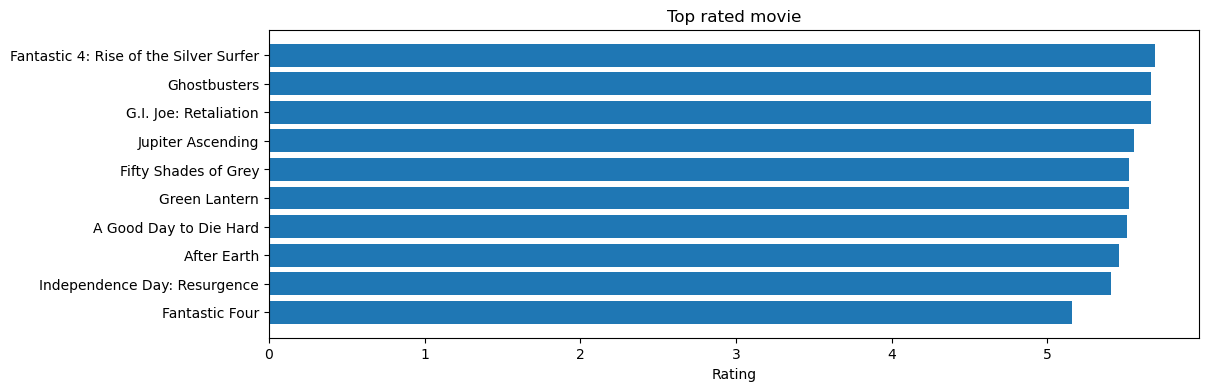

In [22]:
rating= movies.sort_values('rating')

plt.figure(figsize=(12,4))

plt.barh(rating['title'].head(10),rating['rating'].head(10))
plt.xlabel("Rating")
plt.title("Top rated movie")

Text(0.5, 1.0, 'Popular Movies')

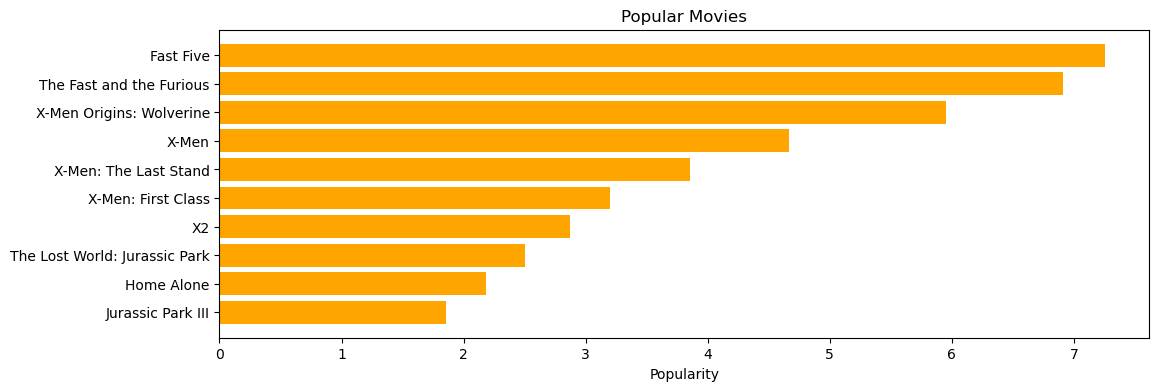

In [23]:

pop= movies.sort_values('popularity')

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), color='orange')

plt.xlabel("Popularity")
plt.title("Popular Movies")

In [24]:
import ast

In [25]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i["name"])
        return L


In [26]:
movies["genres"] = movies["genres"].apply(convert)
movies["keywords"] = movies["keywords"].apply(convert)
movies.head()

movie_id                     title  \
1887       278  The Shawshank Redemption   
662        550                Fight Club   
65         155           The Dark Knight   
3237       680              Pulp Fiction   
96       27205                 Inception   

                                               overview      genres  \
1887  Framed in the 1940s for the double murder of h...     [Drama]   
662   A ticking-time-bomb insomniac and a slippery s...     [Drama]   
65    Batman raises the stakes in his war on crime. ...     [Drama]   
3237  A burger-loving hit man, his philosophical par...  [Thriller]   
96    Cobb, a skilled thief who commits corporate es...    [Action]   

             keywords                                               cast  \
1887         [prison]  [{"cast_id": 3, "character": "Andy Dufresne", ...   
662   [support group]  [{"cast_id": 4, "character": "The Narrator", "...   
65        [dc comics]  [{"cast_id": 35, "character": "Bruce Wayne", "...   
3237    [transporter]  [{"cast_id": 2, "character": "Vincent Vega", "...   
96    [loss of lover]  [{"cast_id": 1, "character": "Dom Cobb", "cred...   

                                                   crew  popularity  \
1887  [{"credit_id": "52fe4231c3a36847f800b153", "de...  136.747729   
662   [{"credit_id": "55731b8192514111610027d7", "de...  146.757391   
65    [{"credit_id": "55a0eb4a925141296b0010f8", "de...  187.322927   
3237  [{"credit_id": "52fe4269c3a36847f801caa3", "de...  121.463076   
96    [{"credit_id": "56e8462cc3a368408400354c", "de...  167.583710   

      vote_count  vote_average    rating  
1887        8205           8.5  8.057910  
662         9413           8.3  7.938140  
65         12002           8.2  7.919124  
3237        8428           8.3  7.903450  
96         13752           8.1  7.862474

In [27]:
def convert3(obj):
    L = []
    count = 0
    for i in ast.literal_eval(obj):
        if count != 3:
            L.append(i["name"])
            count +=1
        else:
            break
    return L 
    

In [28]:
movies["cast"] = movies["cast"].apply(convert3)

In [29]:
movies.head()

movie_id                     title  \
1887       278  The Shawshank Redemption   
662        550                Fight Club   
65         155           The Dark Knight   
3237       680              Pulp Fiction   
96       27205                 Inception   

                                               overview      genres  \
1887  Framed in the 1940s for the double murder of h...     [Drama]   
662   A ticking-time-bomb insomniac and a slippery s...     [Drama]   
65    Batman raises the stakes in his war on crime. ...     [Drama]   
3237  A burger-loving hit man, his philosophical par...  [Thriller]   
96    Cobb, a skilled thief who commits corporate es...    [Action]   

             keywords                                               cast  \
1887         [prison]          [Tim Robbins, Morgan Freeman, Bob Gunton]   
662   [support group]              [Edward Norton, Brad Pitt, Meat Loaf]   
65        [dc comics]      [Christian Bale, Heath Ledger, Aaron Eckhart]   
3237    [transporter]    [John Travolta, Samuel L. Jackson, Uma Thurman]   
96    [loss of lover]  [Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...   

                                                   crew  popularity  \
1887  [{"credit_id": "52fe4231c3a36847f800b153", "de...  136.747729   
662   [{"credit_id": "55731b8192514111610027d7", "de...  146.757391   
65    [{"credit_id": "55a0eb4a925141296b0010f8", "de...  187.322927   
3237  [{"credit_id": "52fe4269c3a36847f801caa3", "de...  121.463076   
96    [{"credit_id": "56e8462cc3a368408400354c", "de...  167.583710   

      vote_count  vote_average    rating  
1887        8205           8.5  8.057910  
662         9413           8.3  7.938140  
65         12002           8.2  7.919124  
3237        8428           8.3  7.903450  
96         13752           8.1  7.862474

In [30]:
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i["job"]=="Director":
            L.append(i["name"])
    return L

In [31]:
movies["crew"]=movies["crew"].apply(fetch_director)    

In [32]:
movies.head()

movie_id                     title  \
1887       278  The Shawshank Redemption   
662        550                Fight Club   
65         155           The Dark Knight   
3237       680              Pulp Fiction   
96       27205                 Inception   

                                               overview      genres  \
1887  Framed in the 1940s for the double murder of h...     [Drama]   
662   A ticking-time-bomb insomniac and a slippery s...     [Drama]   
65    Batman raises the stakes in his war on crime. ...     [Drama]   
3237  A burger-loving hit man, his philosophical par...  [Thriller]   
96    Cobb, a skilled thief who commits corporate es...    [Action]   

             keywords                                               cast  \
1887         [prison]          [Tim Robbins, Morgan Freeman, Bob Gunton]   
662   [support group]              [Edward Norton, Brad Pitt, Meat Loaf]   
65        [dc comics]      [Christian Bale, Heath Ledger, Aaron Eckhart]   
3237    [transporter]    [John Travolta, Samuel L. Jackson, Uma Thurman]   
96    [loss of lover]  [Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...   

                     crew  popularity  vote_count  vote_average    rating  
1887     [Frank Darabont]  136.747729        8205           8.5  8.057910  
662       [David Fincher]  146.757391        9413           8.3  7.938140  
65    [Christopher Nolan]  187.322927       12002           8.2  7.919124  
3237  [Quentin Tarantino]  121.463076        8428           8.3  7.903450  
96    [Christopher Nolan]  167.583710       13752           8.1  7.862474

In [33]:
movies["overview"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [34]:
movies["overview"]= movies["overview"].apply(lambda x:x.split())

In [35]:
movies

movie_id                         title  \
1887       278      The Shawshank Redemption   
662        550                    Fight Club   
65         155               The Dark Knight   
3237       680                  Pulp Fiction   
96       27205                     Inception   
...        ...                           ...   
41       44912                 Green Lantern   
337      47964        A Good Day to Die Hard   
193      82700                   After Earth   
91       47933  Independence Day: Resurgence   
242     166424                Fantastic Four   

                                               overview             genres  \
1887  [Framed, in, the, 1940s, for, the, double, mur...            [Drama]   
662   [A, ticking-time-bomb, insomniac, and, a, slip...            [Drama]   
65    [Batman, raises, the, stakes, in, his, war, on...            [Drama]   
3237  [A, burger-loving, hit, man,, his, philosophic...         [Thriller]   
96    [Cobb,, a, skilled, thief, who, commits, corpo...           [Action]   
...                                                 ...                ...   
41    [For, centuries,, a, small, but, powerful, for...        [Adventure]   
337   [Iconoclastic,, take-no-prisoners, cop, John, ...           [Action]   
193   [One, thousand, years, after, cataclysmic, eve...  [Science Fiction]   
91    [We, always, knew, they, were, coming, back., ...           [Action]   
242   [Four, young, outsiders, teleport, to, a, dang...           [Action]   

                 keywords                                               cast  \
1887             [prison]          [Tim Robbins, Morgan Freeman, Bob Gunton]   
662       [support group]              [Edward Norton, Brad Pitt, Meat Loaf]   
65            [dc comics]      [Christian Bale, Heath Ledger, Aaron Eckhart]   
3237        [transporter]    [John Travolta, Samuel L. Jackson, Uma Thurman]   
96        [loss of lover]  [Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...   
...                   ...                                                ...   
41            [dc comics]     [Ryan Reynolds, Blake Lively, Peter Sarsgaard]   
337                [bomb]       [Bruce Willis, Jai Courtney, Sebastian Koch]   
193            [dystopia]          [Jaden Smith, Will Smith, Sophie Okonedo]   
91    [alternate history]      [Liam Hemsworth, Jeff Goldblum, Bill Pullman]   
242       [teleportation]       [Miles Teller, Kate Mara, Michael B. Jordan]   

                      crew  popularity  vote_count  vote_average    rating  
1887      [Frank Darabont]  136.747729        8205           8.5  8.057910  
662        [David Fincher]  146.757391        9413           8.3  7.938140  
65     [Christopher Nolan]  187.322927       12002           8.2  7.919124  
3237   [Quentin Tarantino]  121.463076        8428           8.3  7.903450  
96     [Christopher Nolan]  167.583710       13752           8.1  7.862474  
...                    ...         ...         ...           ...       ...  
41       [Martin Campbell]   51.872839        2487           5.1  5.523372  
337           [John Moore]   65.402595        3493           5.2  5.509024  
193   [M. Night Shyamalan]   42.840582        2532           5.0  5.461194  
91       [Roland Emmerich]   48.775723        2491           4.9  5.408125  
242           [Josh Trank]   38.126095        2278           4.4  5.158218  

[481 rows x 11 columns]

In [36]:
movies["cast"]=movies["cast"].apply(lambda x:[i.replace(" ","") for i in x])
movies["crew"]=movies["crew"].apply(lambda x:[i.replace(" ","") for i in x])

In [37]:
movies

movie_id                         title  \
1887       278      The Shawshank Redemption   
662        550                    Fight Club   
65         155               The Dark Knight   
3237       680                  Pulp Fiction   
96       27205                     Inception   
...        ...                           ...   
41       44912                 Green Lantern   
337      47964        A Good Day to Die Hard   
193      82700                   After Earth   
91       47933  Independence Day: Resurgence   
242     166424                Fantastic Four   

                                               overview             genres  \
1887  [Framed, in, the, 1940s, for, the, double, mur...            [Drama]   
662   [A, ticking-time-bomb, insomniac, and, a, slip...            [Drama]   
65    [Batman, raises, the, stakes, in, his, war, on...            [Drama]   
3237  [A, burger-loving, hit, man,, his, philosophic...         [Thriller]   
96    [Cobb,, a, skilled, thief, who, commits, corpo...           [Action]   
...                                                 ...                ...   
41    [For, centuries,, a, small, but, powerful, for...        [Adventure]   
337   [Iconoclastic,, take-no-prisoners, cop, John, ...           [Action]   
193   [One, thousand, years, after, cataclysmic, eve...  [Science Fiction]   
91    [We, always, knew, they, were, coming, back., ...           [Action]   
242   [Four, young, outsiders, teleport, to, a, dang...           [Action]   

                 keywords                                               cast  \
1887             [prison]             [TimRobbins, MorganFreeman, BobGunton]   
662       [support group]                 [EdwardNorton, BradPitt, MeatLoaf]   
65            [dc comics]         [ChristianBale, HeathLedger, AaronEckhart]   
3237        [transporter]        [JohnTravolta, SamuelL.Jackson, UmaThurman]   
96        [loss of lover]  [LeonardoDiCaprio, JosephGordon-Levitt, EllenP...   
...                   ...                                                ...   
41            [dc comics]        [RyanReynolds, BlakeLively, PeterSarsgaard]   
337                [bomb]          [BruceWillis, JaiCourtney, SebastianKoch]   
193            [dystopia]             [JadenSmith, WillSmith, SophieOkonedo]   
91    [alternate history]         [LiamHemsworth, JeffGoldblum, BillPullman]   
242       [teleportation]           [MilesTeller, KateMara, MichaelB.Jordan]   

                    crew  popularity  vote_count  vote_average    rating  
1887     [FrankDarabont]  136.747729        8205           8.5  8.057910  
662       [DavidFincher]  146.757391        9413           8.3  7.938140  
65    [ChristopherNolan]  187.322927       12002           8.2  7.919124  
3237  [QuentinTarantino]  121.463076        8428           8.3  7.903450  
96    [ChristopherNolan]  167.583710       13752           8.1  7.862474  
...                  ...         ...         ...           ...       ...  
41      [MartinCampbell]   51.872839        2487           5.1  5.523372  
337          [JohnMoore]   65.402595        3493           5.2  5.509024  
193   [M.NightShyamalan]   42.840582        2532           5.0  5.461194  
91      [RolandEmmerich]   48.775723        2491           4.9  5.408125  
242          [JoshTrank]   38.126095        2278           4.4  5.158218  

[481 rows x 11 columns]

In [38]:
# now dataset is ready to make tags

movies['tags'] = movies['overview'] + movies['keywords'] + movies['genres'] + movies['cast'] + movies['crew']

In [39]:
movies.head()

movie_id                     title  \
1887       278  The Shawshank Redemption   
662        550                Fight Club   
65         155           The Dark Knight   
3237       680              Pulp Fiction   
96       27205                 Inception   

                                               overview      genres  \
1887  [Framed, in, the, 1940s, for, the, double, mur...     [Drama]   
662   [A, ticking-time-bomb, insomniac, and, a, slip...     [Drama]   
65    [Batman, raises, the, stakes, in, his, war, on...     [Drama]   
3237  [A, burger-loving, hit, man,, his, philosophic...  [Thriller]   
96    [Cobb,, a, skilled, thief, who, commits, corpo...    [Action]   

             keywords                                               cast  \
1887         [prison]             [TimRobbins, MorganFreeman, BobGunton]   
662   [support group]                 [EdwardNorton, BradPitt, MeatLoaf]   
65        [dc comics]         [ChristianBale, HeathLedger, AaronEckhart]   
3237    [transporter]        [JohnTravolta, SamuelL.Jackson, UmaThurman]   
96    [loss of lover]  [LeonardoDiCaprio, JosephGordon-Levitt, EllenP...   

                    crew  popularity  vote_count  vote_average    rating  \
1887     [FrankDarabont]  136.747729        8205           8.5  8.057910   
662       [DavidFincher]  146.757391        9413           8.3  7.938140   
65    [ChristopherNolan]  187.322927       12002           8.2  7.919124   
3237  [QuentinTarantino]  121.463076        8428           8.3  7.903450   
96    [ChristopherNolan]  167.583710       13752           8.1  7.862474   

                                                   tags  
1887  [Framed, in, the, 1940s, for, the, double, mur...  
662   [A, ticking-time-bomb, insomniac, and, a, slip...  
65    [Batman, raises, the, stakes, in, his, war, on...  
3237  [A, burger-loving, hit, man,, his, philosophic...  
96    [Cobb,, a, skilled, thief, who, commits, corpo...

In [40]:
# now ther is no need of overview, keywords, genre, cast, crew

tags_df = movies[["movie_id", "title", "tags"]]

In [41]:
tags_df

movie_id                         title  \
1887       278      The Shawshank Redemption   
662        550                    Fight Club   
65         155               The Dark Knight   
3237       680                  Pulp Fiction   
96       27205                     Inception   
...        ...                           ...   
41       44912                 Green Lantern   
337      47964        A Good Day to Die Hard   
193      82700                   After Earth   
91       47933  Independence Day: Resurgence   
242     166424                Fantastic Four   

                                                   tags  
1887  [Framed, in, the, 1940s, for, the, double, mur...  
662   [A, ticking-time-bomb, insomniac, and, a, slip...  
65    [Batman, raises, the, stakes, in, his, war, on...  
3237  [A, burger-loving, hit, man,, his, philosophic...  
96    [Cobb,, a, skilled, thief, who, commits, corpo...  
...                                                 ...  
41    [For, centuries,, a, small, but, powerful, for...  
337   [Iconoclastic,, take-no-prisoners, cop, John, ...  
193   [One, thousand, years, after, cataclysmic, eve...  
91    [We, always, knew, they, were, coming, back., ...  
242   [Four, young, outsiders, teleport, to, a, dang...  

[481 rows x 3 columns]

In [42]:
tags_df['tags'] = tags_df['tags'].apply(lambda x: " ".join(x))

C:\Users\HP\AppData\Local\Temp\ipykernel_9956\446995320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags_df['tags'] = tags_df['tags'].apply(lambda x: " ".join(x))


In [43]:
tags_df['tags'] = tags_df['tags'].apply(lambda x: x.lower())

C:\Users\HP\AppData\Local\Temp\ipykernel_9956\1913381112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags_df['tags'] = tags_df['tags'].apply(lambda x: x.lower())


In [44]:
tags_df

movie_id                         title  \
1887       278      The Shawshank Redemption   
662        550                    Fight Club   
65         155               The Dark Knight   
3237       680                  Pulp Fiction   
96       27205                     Inception   
...        ...                           ...   
41       44912                 Green Lantern   
337      47964        A Good Day to Die Hard   
193      82700                   After Earth   
91       47933  Independence Day: Resurgence   
242     166424                Fantastic Four   

                                                   tags  
1887  framed in the 1940s for the double murder of h...  
662   a ticking-time-bomb insomniac and a slippery s...  
65    batman raises the stakes in his war on crime. ...  
3237  a burger-loving hit man, his philosophical par...  
96    cobb, a skilled thief who commits corporate es...  
...                                                 ...  
41    for centuries, a small but powerful force of w...  
337   iconoclastic, take-no-prisoners cop john mccla...  
193   one thousand years after cataclysmic events fo...  
91    we always knew they were coming back. using re...  
242   four young outsiders teleport to a dangerous u...  

[481 rows x 3 columns]

In [45]:
# now we'll do text vetorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)

In [46]:
cv.fit_transform(tags_df['tags']).toarray().shape

(481, 5000)

In [47]:
vectors = cv.fit_transform(tags_df['tags']).toarray()

In [48]:
vectors.shape

(481, 5000)

In [49]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
cosine_similarity(vectors)

array([[1.        , 0.27560354, 0.4246664 , ..., 0.39507551, 0.34763629,
        0.19509294],
       [0.27560354, 1.        , 0.24873417, ..., 0.17817416, 0.25      ,
        0.19827063],
       [0.4246664 , 0.24873417, 1.        , ..., 0.3228883 , 0.47081825,
        0.24210006],
       ...,
       [0.39507551, 0.17817416, 0.3228883 , ..., 1.        , 0.23014162,
        0.28903666],
       [0.34763629, 0.25      , 0.47081825, ..., 0.23014162, 1.        ,
        0.17573987],
       [0.19509294, 0.19827063, 0.24210006, ..., 0.28903666, 0.17573987,
        1.        ]])

In [52]:
cosine_similarity(vectors).shape

(481, 481)

In [53]:
similarity = cosine_similarity(vectors)

In [54]:
similarity[0]

array([1.        , 0.27560354, 0.4246664 , 0.19212363, 0.40237919,
       0.3986569 , 0.35954582, 0.33649269, 0.39911041, 0.30384007,
       0.38929509, 0.34871503, 0.27241476, 0.32547228, 0.3943371 ,
       0.44915254, 0.19945783, 0.3424468 , 0.15322775, 0.35360595,
       0.39647579, 0.2952407 , 0.23530243, 0.3720458 , 0.36384973,
       0.35255324, 0.26792657, 0.11051407, 0.29752727, 0.43339353,
       0.27655569, 0.46634232, 0.54810319, 0.41811291, 0.21480074,
       0.36452895, 0.23802124, 0.3608328 , 0.29026212, 0.18411492,
       0.44654428, 0.43584773, 0.30691721, 0.37052414, 0.34069093,
       0.22394825, 0.31708681, 0.31971304, 0.35506154, 0.34302512,
       0.30483272, 0.56001623, 0.35800124, 0.31728173, 0.31443609,
       0.35555886, 0.43519757, 0.31071821, 0.26146048, 0.3741219 ,
       0.42316838, 0.33994471, 0.28107814, 0.27195577, 0.42580343,
       0.3435549 , 0.40850499, 0.33218375, 0.36886858, 0.46765237,
       0.32735117, 0.27617239, 0.44369051, 0.32877169, 0.39056

In [55]:
similarity.shape

(481, 481)

In [56]:
tags_df

movie_id                         title  \
1887       278      The Shawshank Redemption   
662        550                    Fight Club   
65         155               The Dark Knight   
3237       680                  Pulp Fiction   
96       27205                     Inception   
...        ...                           ...   
41       44912                 Green Lantern   
337      47964        A Good Day to Die Hard   
193      82700                   After Earth   
91       47933  Independence Day: Resurgence   
242     166424                Fantastic Four   

                                                   tags  
1887  framed in the 1940s for the double murder of h...  
662   a ticking-time-bomb insomniac and a slippery s...  
65    batman raises the stakes in his war on crime. ...  
3237  a burger-loving hit man, his philosophical par...  
96    cobb, a skilled thief who commits corporate es...  
...                                                 ...  
41    for centuries, a small but powerful force of w...  
337   iconoclastic, take-no-prisoners cop john mccla...  
193   one thousand years after cataclysmic events fo...  
91    we always knew they were coming back. using re...  
242   four young outsiders teleport to a dangerous u...  

[481 rows x 3 columns]

In [57]:
def recommend(movie):
    movie_index = tags_df[tags_df['title'] == movie].index[0]
    distance = similarity[movie_index]
    movie_list = sorted(list(enumerate(distance)), reverse=True, key = lambda x:x[0])[0:5]
    for i in movie_list:
        print(tags_df.iloc[i[0]].title)

In [58]:
recommend("Quantum of Solace")

Fantastic Four
Independence Day: Resurgence
After Earth
A Good Day to Die Hard
Green Lantern


In [59]:
recommend("The Dark Knight Rises")

Fantastic Four
Independence Day: Resurgence
After Earth
A Good Day to Die Hard
Green Lantern


In [60]:
recommend("Pirates of the Caribbean: At World's End")

Fantastic Four
Independence Day: Resurgence
After Earth
A Good Day to Die Hard
Green Lantern


In [61]:
recommend("Avatar")

Fantastic Four
Independence Day: Resurgence
After Earth
A Good Day to Die Hard
Green Lantern


In [62]:
recommend("Spectre")

Fantastic Four
Independence Day: Resurgence
After Earth
A Good Day to Die Hard
Green Lantern


# Thank you😊